## Group 2
- Nofisat Hamod
- Akinbuli Feyisara
- Badrudeen Abdullahi
- Afees Disu
- Olatunji Omisakin
- Misbaudeen Usamah

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### From the dataset, we have 891 rows and 12 columns.

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Calculating the percentage of null values in the dataset per column, Age has around 20% of its values to be null and Cabin has around 77%

In [8]:
# geting median value of Age
median_age = df.Age.median()
median_age

28.0

In [9]:
# filling age null values
df['Age'].fillna(median_age, inplace=True)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Given the Cabin Variable has most of its dataset to be null, it is best to drop the column so as not to make it biased.

In [13]:
df.drop(labels='Cabin', axis=1, inplace=True)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
# getting mode value for embarked col

emb_mode = df['Embarked'].mode()
emb_mode

0    S
Name: Embarked, dtype: object

In [16]:
# filling nan val

df['Embarked'].fillna(emb_mode[0], inplace=True)

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Univariate Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


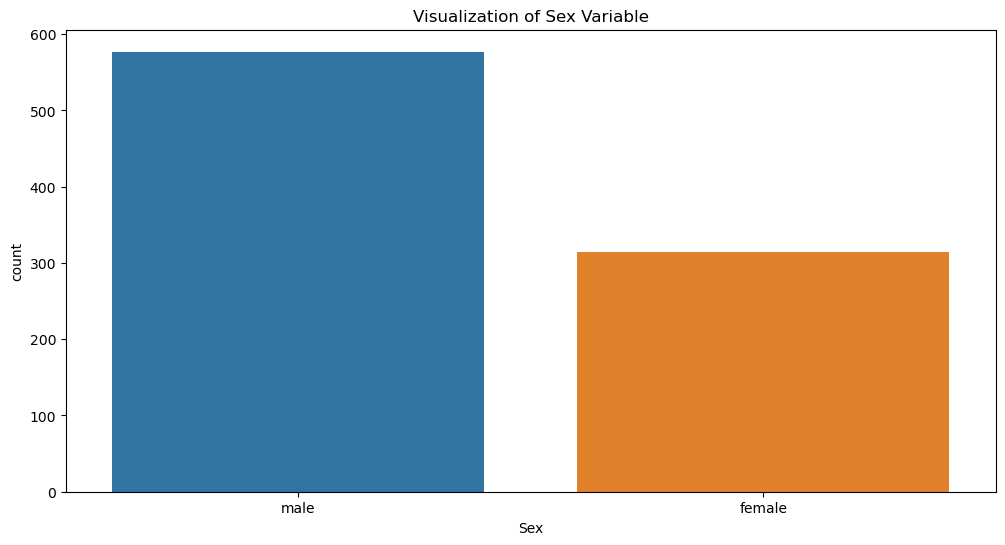

In [20]:
# visualising sex embarked

# Visualizing Sex column

plt.figure(figsize=(12, 6))
sns.countplot(x=df.Sex)
plt.title('Visualization of Sex Variable')
# plt.xticks(rotation=90)
plt.show()

In [21]:
df.Sex.value_counts() / len(df) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

### From the viz and % values calculated, we have more males ~65% and less females ~35% aboard

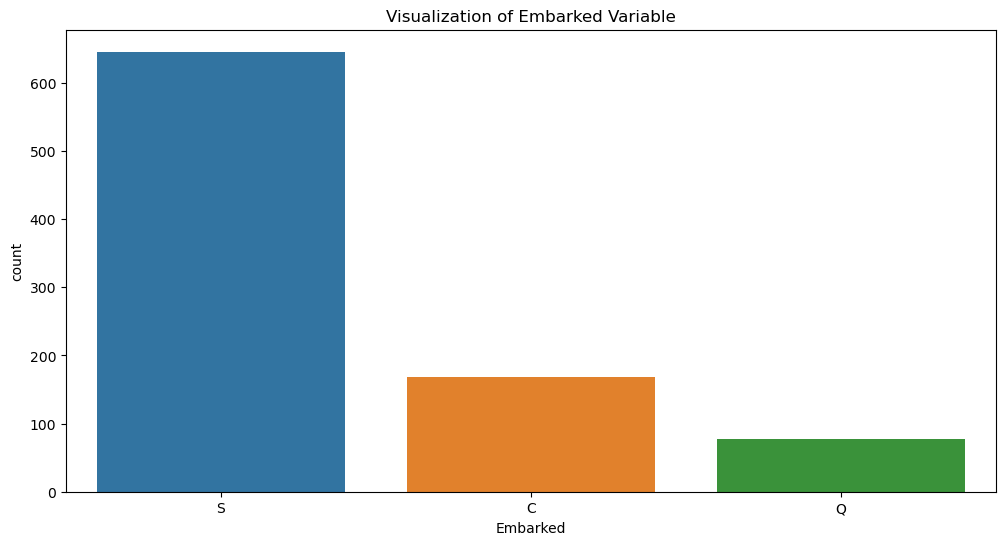

In [22]:
# Visualizing Embarked column

plt.figure(figsize=(12, 6))
sns.countplot(x=df.Embarked)
plt.title('Visualization of Embarked Variable')
# plt.xticks(rotation=90)
plt.show()

In [26]:
df.Embarked.value_counts() / len(df) * 100

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

### From the viz and the percentage calculated above, more people embarked from point S, with ~73%, than point C and Q. This is followed by point C ~19% and then point Q ~9%.

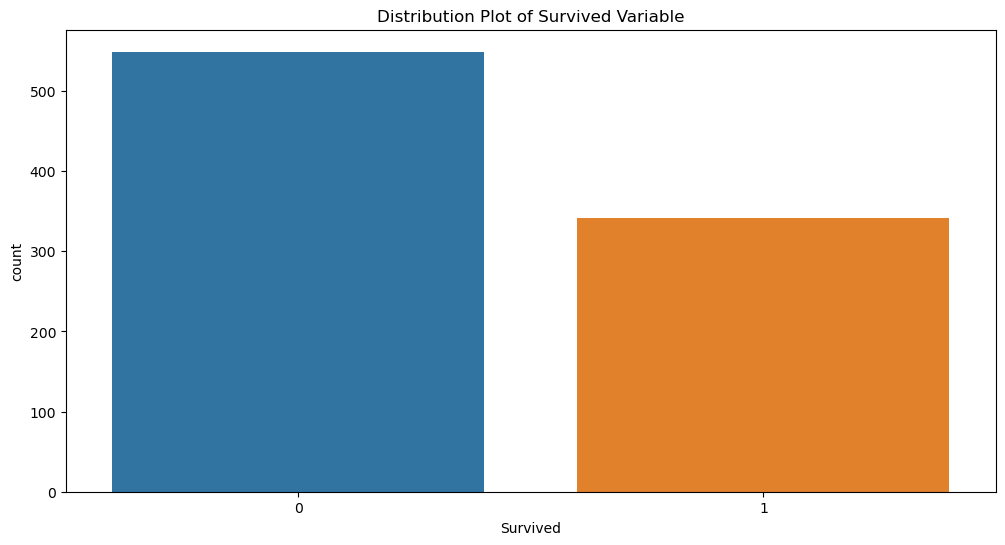

In [23]:
# survived, age, pclass, sibsp, parch, fare

# visualising the survived column 
plt.figure(figsize=(12, 6))
sns.countplot(x=df.Survived)
plt.title('Distribution Plot of Survived Variable')
plt.show()

In [24]:
df.Survived.value_counts() / len(df) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

### From the viz, more people did not survive (62%) and less people survived (38%)

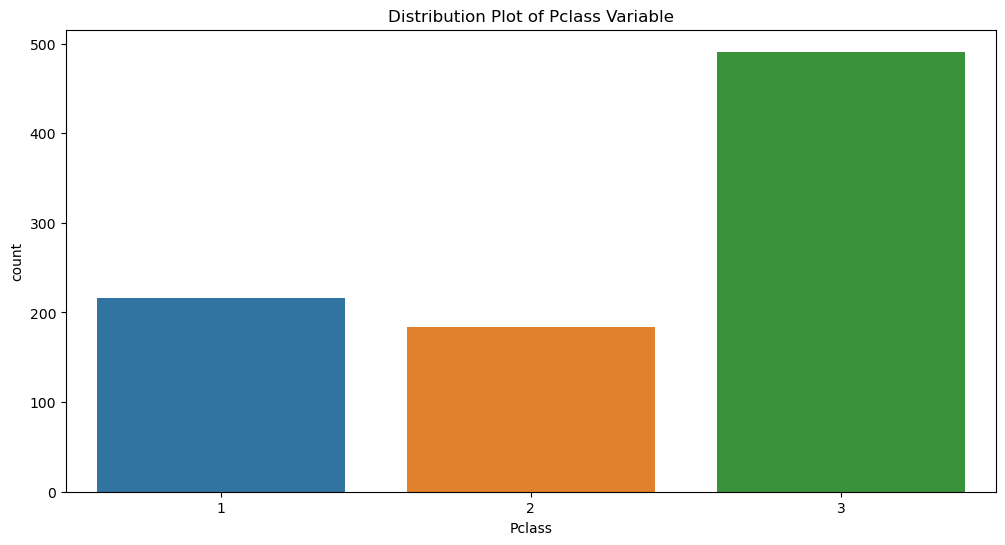

In [25]:
# viz pclass
plt.figure(figsize=(12, 6))
sns.countplot(x=df.Pclass)
plt.title('Distribution Plot of Pclass Variable')
plt.show()

In [46]:
df.Pclass.value_counts() / len(df) * 100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

### From the viz, more people boarded 3rd class (55%), then 2nd class (24%) and 1st class (21%)

#### Creating a new col to categorise age 
- Children (0 - 12)
- Teens (12 - 20)
- Youth (20 - 30)
- Adult (30 - 50)
- Elderly (rest)

In [42]:
df['Age_Category'] = ['Children' if 0<age<=12 else 'Teens' if 12<age<=20 else 'Youth' if 20<age<=30 \
                        else 'Adult' if 30<age<=50 else 'Elderly' for age in list(df['Age'].values)]

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


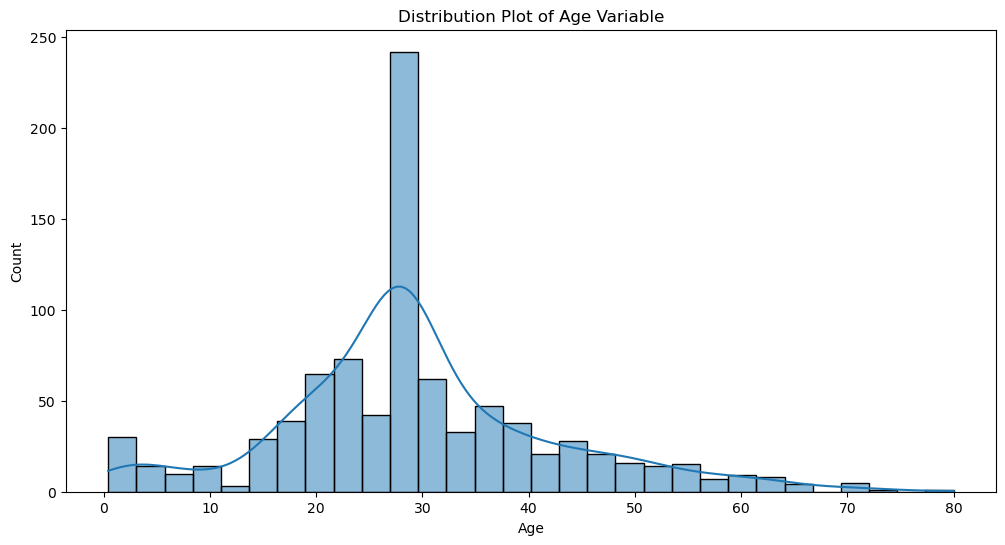

In [44]:
# age viz
plt.figure(figsize=(12, 6))
sns.histplot(df.Age, kde=True)
plt.title('Distribution Plot of Age Variable')
plt.show()

### From the viz, the age distribution is close to a normal distribution, with the mean, median, and mode around the center of the plot.

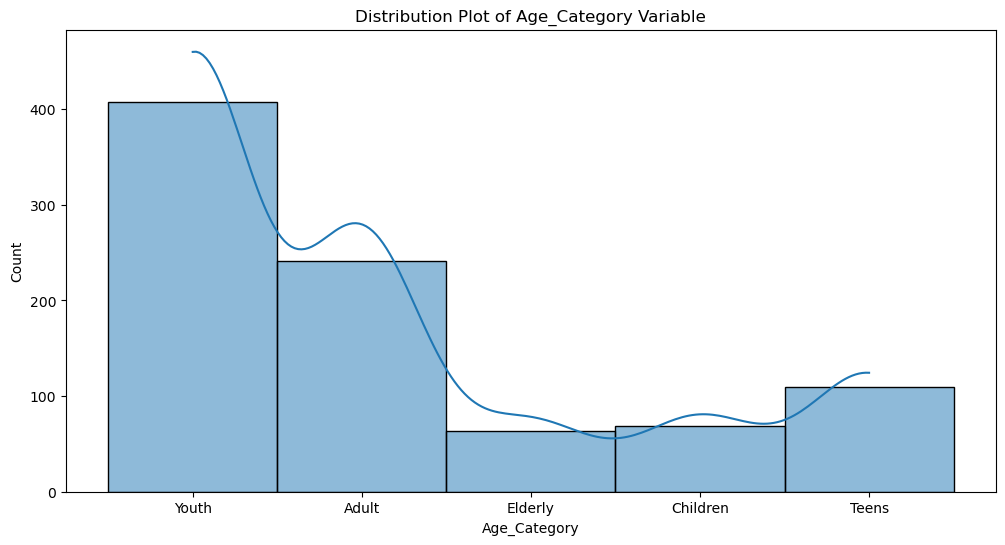

In [45]:
# visualising age_category col
plt.figure(figsize=(12, 6))
sns.histplot(df.Age_Category, kde=True)
plt.title('Distribution Plot of Age_Category Variable')
plt.show()

### From this visualization, there are more youth, followed by Adult, then Teens, then Children, and then the Elderly.

## Bivariate Analysis

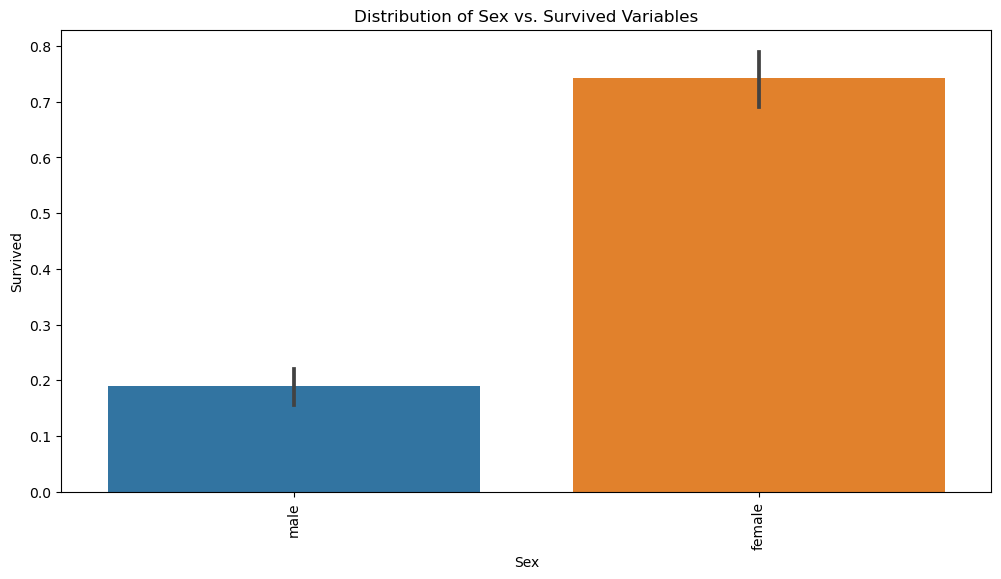

In [46]:
# Sex to Survived

plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y = 'Survived', data=df)
plt.title('Distribution of Sex vs. Survived Variables')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.xticks(rotation=90)
plt.show()

From the viz, more female survived than males

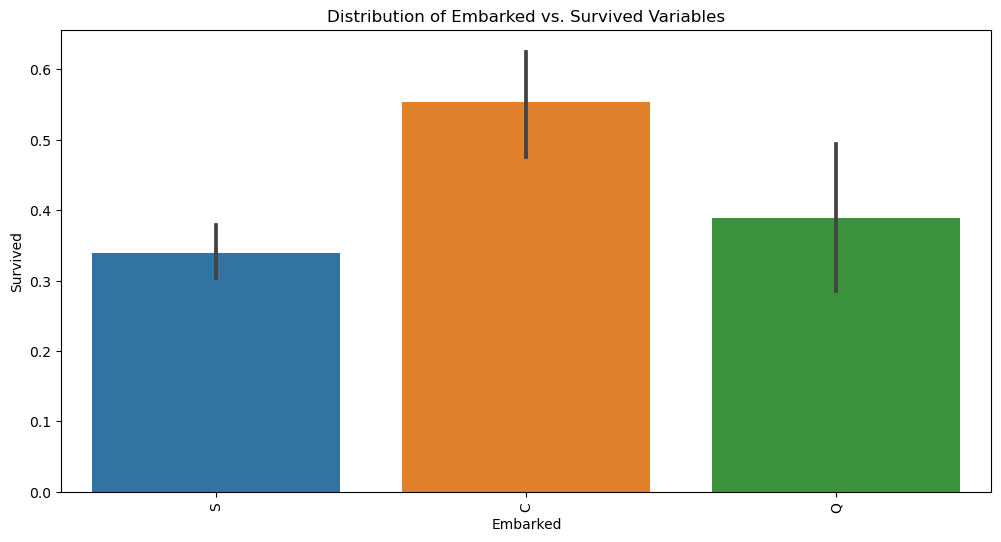

In [47]:
# Embarked to Survived

plt.figure(figsize=(12, 6))
sns.barplot(x='Embarked', y = 'Survived', data=df)
plt.title('Distribution of Embarked vs. Survived Variables')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.xticks(rotation=90)
plt.show()

People that embakred at point C survived more, then point Q...

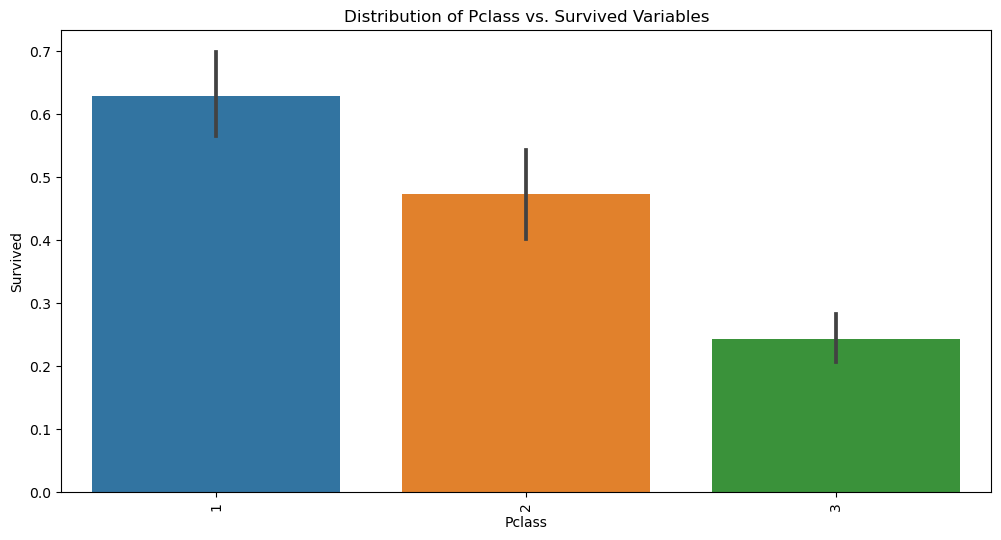

In [48]:
# Pclass to Survived

plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y = 'Survived', data=df)
plt.title('Distribution of Pclass vs. Survived Variables')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.xticks(rotation=90)
plt.show()

From the viz, 1st class people survived more, than...

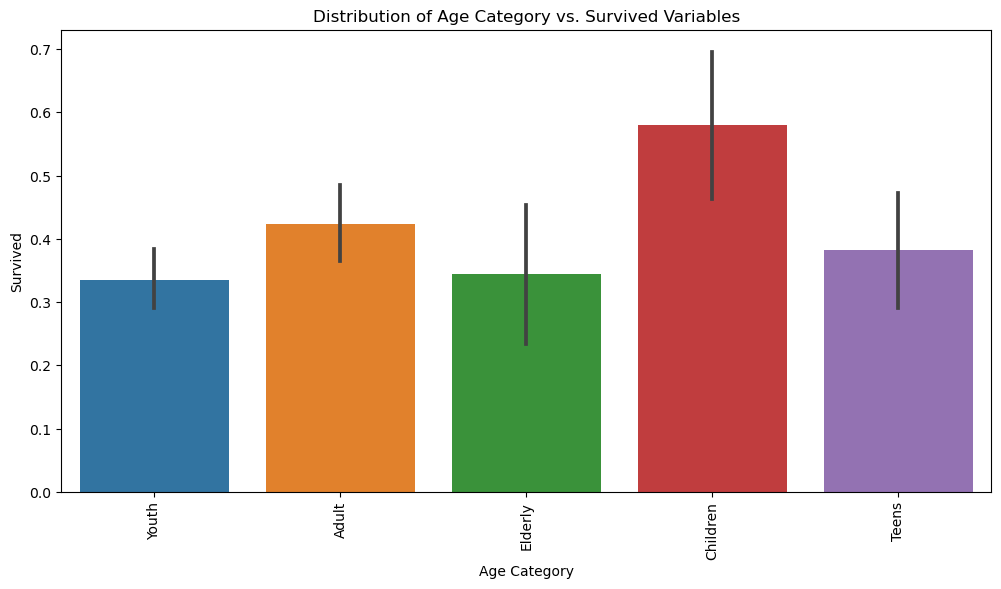

In [50]:
# Age_category to Survived

plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Category', y = 'Survived', data=df)
plt.title('Distribution of Age Category vs. Survived Variables')
plt.xlabel('Age Category')
plt.ylabel('Survived')
plt.xticks(rotation=90)
plt.show()

### From the viz above, children, within 0 - 12 years survived most, followed by Adult, within > 12 years and 20...

In [52]:
df.Age_Category.value_counts() / len(df) * 100

Youth       45.679012
Adult       27.048260
Teens       12.345679
Children     7.744108
Elderly      7.182941
Name: Age_Category, dtype: float64

In [67]:
corr_matrix = df[['Age', 'Survived']].corr()
corr_matrix

,Age,Survived
Age,1.000000,-0.064909
Survived,-0.064909,1.000000


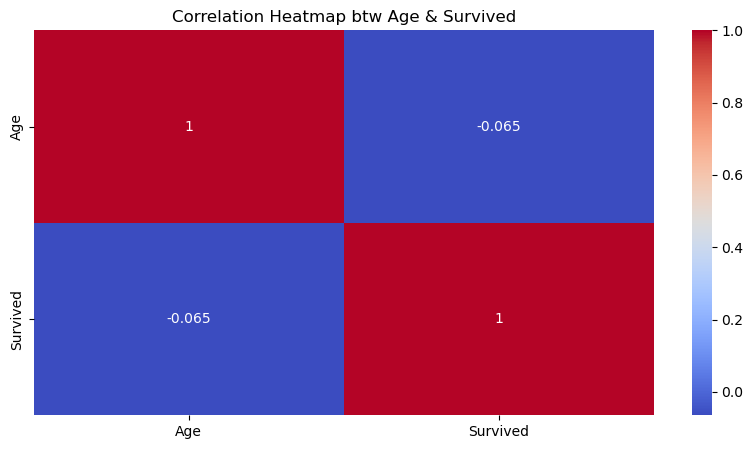

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title('Correlation Heatmap btw Age & Survived')
plt.show()

From the viz, there is close to no correlation between passengers Age and Survival